<a href="https://colab.research.google.com/github/pramanand-coder/Machine-Learning/blob/main/WebAdOptimization_UpperConfidenceBound_ReinforcementLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing the basic library**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

**Loading the dataset from local directory**

In [ ]:
from google.colab import files
u=files.upload()

Saving dataset.csv to dataset.csv


In [ ]:
dataset=pd.read_csv("dataset.csv")

**Summarizing the dataset**

In [ ]:
print(dataset.head())

   Ad 1  Ad 2  Ad 3  Ad 4  Ad 5  Ad 6  Ad 7  Ad 8  Ad 9  Ad 10
0     1     0     0     0     1     0     0     0     1      0
1     0     0     0     0     0     0     0     0     1      0
2     0     0     0     0     0     0     0     0     0      0
3     0     1     0     0     0     0     0     1     0      0
4     0     0     0     0     0     0     0     0     0      0


In [ ]:
print(dataset.shape)
print(dataset.info())

(10000, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Ad 1    10000 non-null  int64
 1   Ad 2    10000 non-null  int64
 2   Ad 3    10000 non-null  int64
 3   Ad 4    10000 non-null  int64
 4   Ad 5    10000 non-null  int64
 5   Ad 6    10000 non-null  int64
 6   Ad 7    10000 non-null  int64
 7   Ad 8    10000 non-null  int64
 8   Ad 9    10000 non-null  int64
 9   Ad 10   10000 non-null  int64
dtypes: int64(10)
memory usage: 781.4 KB
None


**Upper Confidence Bound**

In [ ]:
import math
observations=10000
no_of_ads=10
ads_selected=[]
no_of_selection_of_ads=[0]*no_of_ads
sum_of_rewards_of_each_ads=[0]*no_of_ads
total_reward=0
for n in range(0,observations):
  ads=0
  max_upper_bound=0
  upper_bound=0
  for i in range(0,no_of_ads):
    if(no_of_selection_of_ads[i]>0):
      average_reward=sum_of_rewards_of_each_ads[i]/no_of_selection_of_ads[i]
      delta_i=math.sqrt(3/2*math.log(n+1)/no_of_selection_of_ads[i])
      upper_bound=average_reward+delta_i
    else:
      upper_bound=1e400
    if(upper_bound>max_upper_bound):
      max_upper_bound=upper_bound
      ads=i
  ads_selected.append(ads)
  no_of_selection_of_ads[ads]=no_of_selection_of_ads[ads]+1
  reward=dataset.values[n,ads]
  sum_of_rewards_of_each_ads[ads]=sum_of_rewards_of_each_ads[ads]+reward
  total_reward=total_reward+reward

print("Rewards by ads=",sum_of_rewards_of_each_ads)
print("Rewards by UCB=",total_reward)
print("Ads selected at each round=",ads_selected)

Rewards by ads= [120, 47, 7, 38, 1675, 1, 27, 236, 20, 7]
Rewards by UCB= 2178
Ads selected at each round= [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 8, 9, 0, 8, 1, 2, 3, 4, 5, 6, 6, 7, 7, 7, 9, 7, 0, 6, 8, 1, 2, 3, 4, 4, 4, 4, 4, 5, 9, 7, 0, 0, 6, 8, 4, 0, 7, 1, 1, 2, 3, 5, 9, 4, 1, 6, 8, 0, 7, 2, 3, 5, 9, 4, 1, 6, 8, 0, 7, 7, 7, 7, 7, 7, 4, 2, 3, 5, 9, 1, 6, 8, 0, 0, 7, 0, 4, 1, 6, 8, 2, 3, 5, 9, 7, 0, 4, 4, 4, 7, 7, 7, 7, 1, 6, 8, 2, 3, 5, 9, 0, 7, 7, 4, 7, 7, 7, 1, 6, 8, 0, 4, 4, 2, 3, 5, 9, 4, 7, 0, 7, 1, 1, 1, 6, 6, 6, 6, 6, 8, 4, 2, 3, 5, 9, 7, 7, 7, 0, 6, 4, 1, 1, 1, 8, 7, 2, 3, 5, 9, 4, 0, 1, 1, 1, 6, 7, 8, 4, 1, 2, 3, 5, 9, 0, 6, 7, 8, 4, 7, 1, 0, 6, 2, 3, 5, 9, 7, 7, 7, 7, 4, 4, 4, 4, 4, 7, 8, 1, 0, 6, 6, 6, 7, 4, 2, 3, 5, 9, 1, 6, 8, 7, 0, 4, 4, 4, 4, 4, 2, 3, 5, 9, 1, 6, 7, 4, 8, 0, 7, 4, 4, 4, 1, 6, 2, 3, 5, 9, 0, 0, 0, 7, 8, 4, 0, 0, 0, 1, 6, 7, 4, 2, 3, 5, 9, 0, 8, 7, 1, 6, 4, 0, 7, 7, 7, 7, 7, 2, 3, 5, 9, 8, 4, 1, 6, 6, 6

**Visualizing the result**

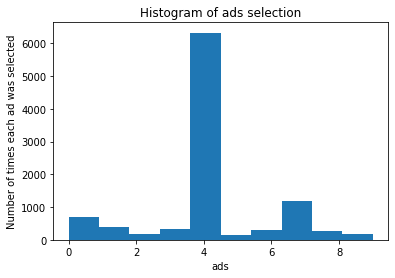

In [ ]:
plt.hist(ads_selected)
plt.title("Histogram of ads selection")
plt.xlabel("ads")
plt.ylabel("Number of times each ad was selected")
plt.show()